In [1]:
%matplotlib notebook
%load_ext autoreload
from glob import glob
from skimage import io
from matplotlib import style
import matplotlib.pyplot as plt
import pandas as pd
from pprint import pprint as pp
from matplotlib.font_manager import FontProperties
import matplotlib
matplotlib.get_backend()
import joblib as jb
import seaborn as sns
import palettable.colorbrewer.qualitative as cbq
sns.set_palette('colorblind')
from IPython.display import SVG
from sklearn.model_selection import train_test_split
import time
import tensorflow as tf
from tqdm import tnrange, tqdm_notebook
from datetime import timedelta
#matplotlib.rcParams['backend'] = 'TkAgg' 

In [2]:
%autoreload 2

In [3]:
import sys
sys.path.append('/Volumes/SAM_USB/Data Science/Short_IPython_notebook/openface')

In [4]:
# %%bash
# PYTHONPATH='/Volumes/SAM_USB/Data Science/Short_IPython_notebook/openface/' 
# python '/Volumes/SAM_USB/Data Science/Short_IPython_notebook/openface/util/align-dlib.py' \
# img align innerEyesAndBottomLip img_ed --size 512


In [5]:
def rgb2gray(rgb):
    return np.dot(rgb[:,:,:3], [0.299, 0.587, 0.114])


In [6]:
org_images=pd.read_pickle('old_data_pandas.pickle')
org_images.head()

,0,1,2,3,4,5,6,7,8,9,...,2296,2297,2298,2299,2300,2301,2302,2303,label,file_no
0,70,80,82,72,58,58,60,63,54,58,...,183,136,106,116,95,106,109,82,0,0
1,151,150,147,155,148,133,111,140,170,174,...,95,108,102,67,171,193,183,184,0,1
2,231,212,156,164,174,138,161,173,182,200,...,152,122,114,101,97,88,110,152,2,2
3,24,32,36,30,32,23,19,20,30,41,...,132,132,133,136,139,142,143,142,4,3
4,4,0,0,0,0,0,0,0,0,0,...,31,31,31,27,31,30,29,30,6,4


In [7]:
mod_images=pd.read_pickle('new_data_pandas_sorted.pickle')
mod_images.head()

,0,1,2,3,4,5,6,7,8,9,...,2296,2297,2298,2299,2300,2301,2302,2303,label,file_no
0,0.576471,0.584314,0.588235,0.592157,0.603922,0.623529,0.643137,0.658824,0.666667,0.662745,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
1,0.000000,0.196078,0.556863,0.560784,0.400000,0.247059,0.431373,0.529412,0.623529,0.682353,...,0.0,0.0,0.000000,0.011765,0.129412,0.235294,0.337255,0.364706,0,1
2,0.011765,0.000000,0.137255,0.411765,0.647059,0.729412,0.819608,0.886275,0.878431,0.866667,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2,2
3,0.000000,0.000000,0.011765,0.043137,0.094118,0.121569,0.129412,0.180392,0.270588,0.352941,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6,4
4,0.439216,0.529412,0.529412,0.509804,0.525490,0.560784,0.568627,0.541176,0.494118,0.396078,...,0.0,0.0,0.003922,0.011765,0.023529,0.031373,0.039216,0.050980,2,5


In [8]:
#label_dict={0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Sad', 5:'Surprise', 6:'Neutral'}
from __future__ import unicode_literals
label_dict={0:['Angry',u'\U0001f620'],1:['Disgust',u'\U0001f641'],2:['Fear',u'\U0001f628'],\
            3:['Happy',u'\U0001f604'],4:['Sad',u'\U0001f622'],5:['Surprise',u'\U0001f632'],\
            6:['Neutral',u'\U0001f610']}

def print_image(x,ax,data=org_images,cmap='gray'):
    #img1=io.imread(x)
    img=data.iloc[x,:2304].values.reshape(48,-1)
    label=label_dict[data.iloc[x,-2]]
    ax.imshow(img,cmap=cmap)
    ax.set_xticks([])
    ax.set_yticks([])
    # ,'DejaVu Sans'
    ax.set_xlabel('{} : {}'.format(label[0],label[1]),\
                  color='blue',fontname='DejaVu Sans',fontsize=15)
    ax.set_aspect('equal')
    #return np.array(img11,dtype='int')

<IPython.core.display.Javascript object>


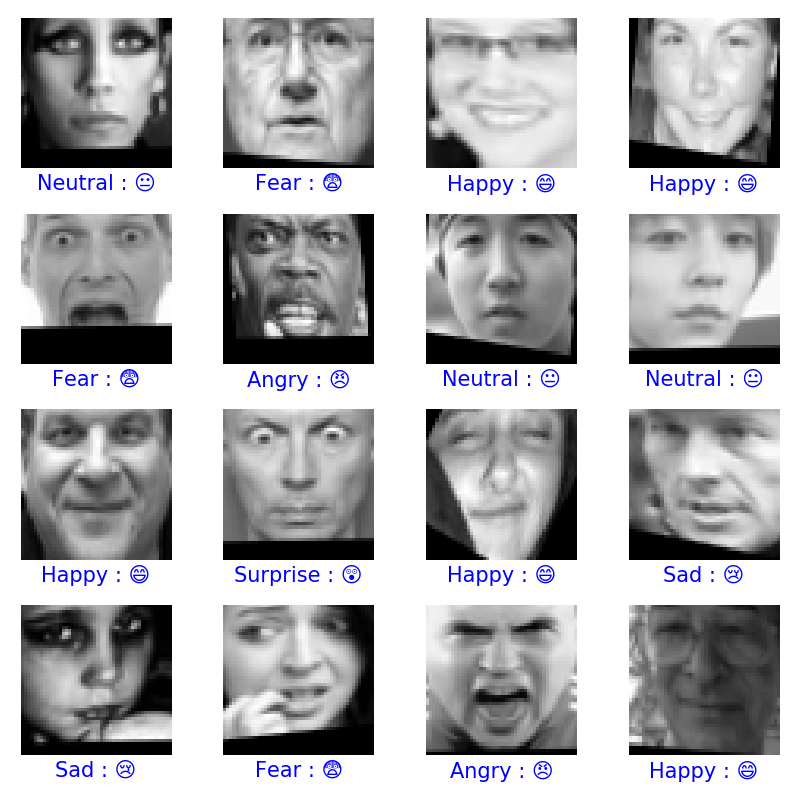

In [9]:
fig,ax=plt.subplots(4,4,figsize=(8,8))
ax=ax.ravel()
for i in range(16):
    print_image(x=i+3,ax=ax[i],data=mod_images)
plt.tight_layout()

fig.subplots_adjust(hspace=0.3,wspace=0.3)

In [10]:
def get_hist(col_name):
    hist_hod=pd.DataFrame(col_name.value_counts())
    hist_hod.insert(0,'Name',hist_hod.index)
    hist_hod.reset_index(inplace=True,drop=True)
    hist_hod['Percentage']=np.round(hist_hod['label']\
                                    /hist_hod['label'].sum()*100,2)
    return hist_hod

hist_hod=get_hist(mod_images.label).sort_values('label',ascending=False)
hist_hod['Name']=hist_hod['Name'].apply(lambda x: label_dict[x][0] )

hist_hod.head()

,Name,label,Percentage
0,Happy,6946,28.01
1,Neutral,4610,18.59
2,Angry,3399,13.71
3,Sad,3307,13.34
4,Fear,3160,12.74


<IPython.core.display.Javascript object>


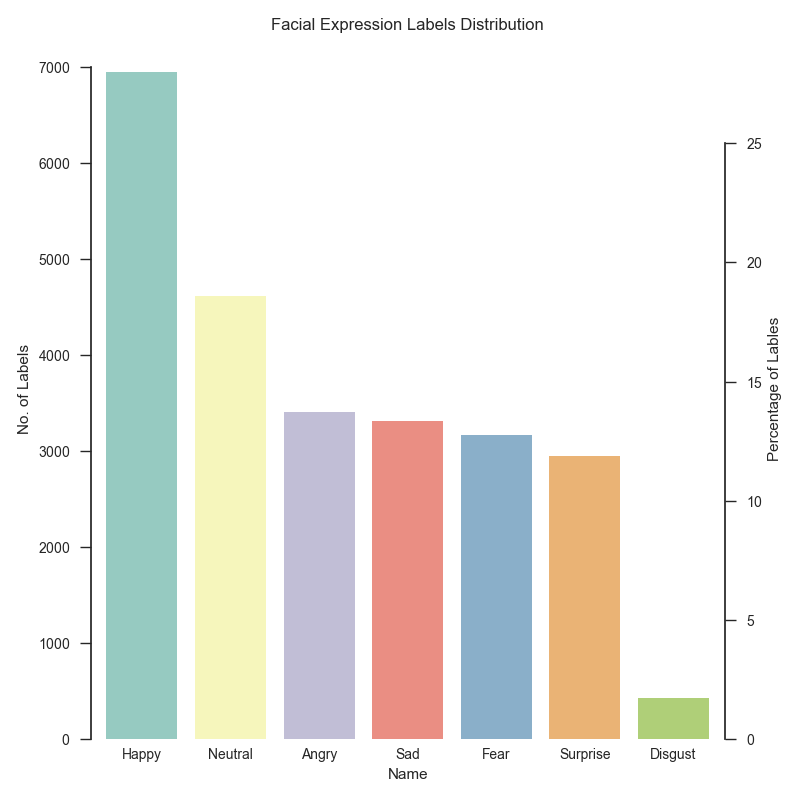

In [11]:
#sns.set(style="darkgrid")
sns.set_style("white",{"xtick.major.size": 0,\
                       'ytick.major.size': 8,\
                       'axes.facecolor':"1"})
#sns.set(style="white", context="talk")
fig,ax=plt.subplots(figsize=(8,8))

sns.barplot(hist_hod.Name,hist_hod.label,palette="Set3",ax=ax)
ax2=ax.twinx()
sns.barplot(hist_hod.Name,hist_hod.Percentage,\
            palette=cbq.Set3_7.mpl_colors,ax=ax2)

ax.set_ylabel('No. of Labels')
ax2.set_ylabel('Percentage of Lables')
sns.despine(ax=ax,top=True,bottom=True,trim=True,offset=5)
sns.despine(ax=ax2,top=True,bottom=True,right=False,left=True,trim=True,offset=5)
plt.title('Facial Expression Labels Distribution')

plt.xlabel('Categories')
plt.tight_layout()
#fig.savefig('labels_dist.pdf',transparent=False)
#sns.barplot(x, y3, palette="Set3", ax=ax3)

In [ ]:
hist_org=get_hist(org_images.label).sort_values('label',ascending=False)
hist_org['Name']=hist_org['Name'].apply(lambda x: label_dict[x][0] )
hist_org.head()

In [ ]:
hist_org['Dataset']='org'
hist_hod['Dataset']='mod'

In [ ]:
new_hist=pd.concat([hist_org,hist_hod],axis=0)
new_hist

In [ ]:
#sns.set(style="darkgrid")
sns.set_style("white",{"xtick.major.size": 0,\
                       'ytick.major.size': 8,\
                       'axes.facecolor':"1"})
#sns.set(style="white", context="talk")
fig,ax=plt.subplots(figsize=(8,8))

sns.barplot(x='Name',y='label',palette=cbq.Set3_4_r.mpl_colors,\
            ax=ax,hue='Dataset',data=new_hist)
# ax2=ax.twinx()
# sns.barplot(x='Name',y='Percentage',\
#             palette=cbq.Set3_4_r.mpl_colors,\
#             hue='Cat',data=new_hist,ax=ax2)

ax.set_ylabel('No. of Labels')
# ax2.set_ylabel('Percentage of Lables')
sns.despine(ax=ax,top=True,bottom=True,trim=True,offset=5)
# sns.despine(ax=ax2,top=True,bottom=True,right=False,left=True,trim=True,offset=5)
plt.title('Facial Expression Labels Distribution')

plt.xlabel('Categories')
plt.tight_layout()
#fig.savefig('labels_dist_comb.pdf',transparent=False)
#sns.barplot(x, y3, palette="Set3", ax=ax3)

In [ ]:
bar_color=cbq.Set3_7.hex_colors


fig,ax=plt.subplots(2,1,figsize=(24,5));
ax=ax.ravel()
#ax[0] = plt.gca();
ax[0].grid(False);
#ax[0].patch.set_visible(False);

ax[0].axis('off');
x=0
y=0
for i in range(len(hist_org.Percentage.values)):
    y += hist_org.Percentage.values[i]
    #print(x,y)
    ax[0].plot([x+i, y+i], [5,5], linewidth=100, 
         linestyle="-", c=bar_color[i],solid_capstyle="butt");
    
    ax[0].annotate(str(y-x)+"%", xy=(x+i+2,4.81),size=25)
    ax[0].annotate(hist_org.Name[i], xy=(x+i+1,4.98),size=30);
    ax[0].annotate('Original\n Dataset',size=30,xy=(-5,4.98),rotation=90,color='red')
    x =y
    
# plt.figure(figsize=(24,3));
# ax = plt.gca();
# ax.grid(False);
# ax.patch.set_visible(False);
# plt.axis('off');
ax[1] = plt.gca();
ax[1].grid(False);
#ax[1].patch.set_visible(False);
ax[1].axis('Off')
x=0
y=0
for i in range(len(hist_hod.Percentage.values)):
    y += hist_hod.Percentage.values[i]
    #print(x,y)
    ax[1].plot([x+i, y+i], [5,5], linewidth=100, 
         linestyle="-", c=bar_color[i],solid_capstyle="butt");
    ax[1].annotate(str(y-x)+"%", xy=(x+i+2,4.81),size=25)
    ax[1].annotate(hist_hod.Name[i], xy=(x+i+1,4.98),size=30);
    ax[1].annotate('Modified\n Dataset',size=30,xy=(-5,4.98),rotation=90,color='red')
    #print(y-x)
    x =y
    
plt.tight_layout()
#fig.savefig('Percentage.pdf',transparent=True)

In [ ]:
#mod_images_dropD=pd.DataFrame.copy(mod_images[mod_images['label'] != 1])
#mod_images_dropD.to_pickle('mod_images_dropDigust.pickle')

In [ ]:
mod_images_dropD=pd.read_pickle('mod_images_dropDigust.pickle')

In [ ]:
mod_images_dropD.head()

In [ ]:
#mod_images_dropD.drop('file_no',inplace=True,axis=1)
#mod_images_dropD.head()

In [ ]:
train, test = train_test_split(mod_images_dropD, test_size = 0.3,\
                                stratify=mod_images_dropD.label.values)

In [ ]:
print(train.label.value_counts())
print(test.label.value_counts())

In [ ]:
test, validation = train_test_split(test, test_size = 0.5,\
                                stratify=test.label.values)

In [ ]:
print(test.label.value_counts())
print(validation.label.value_counts())

In [ ]:
test_y=pd.get_dummies(test['label']).values
validation_y=pd.get_dummies(validation['label']).values
train_y=pd.get_dummies(train['label']).values

In [ ]:
train_x=train.iloc[:,:2304].values
validation_x=validation.iloc[:,:2304].values
test_x=test.iloc[:,:2304].values

## Data Dimension

In [ ]:
image_size=48
image_size_flat=image_size*image_size
image_shape=(image_size,image_size)
# Number of colour channels for the images: 1 channel for gray-scale.
num_channels = 1
num_classes = 6

## Convolutional Network Architecture

In [ ]:
# Convolutional Layer 1.
filter_size1 = 5          # Convolution filters are 5 x 5 pixels.
num_filters1 = 16         # There are 16 of these filters.

# Convolutional Layer 2.
filter_size2 = 5          # Convolution filters are 5 x 5 pixels.
num_filters2 = 36         # There are 36 of these filters.

# Fully-connected layer.
dc_size = 128   

## Generate Filenames for Plots

In [ ]:
def gen_seq_fname(ext='pdf',count_file='count.dat',reset_count='False'):
    if reset_count =='True':
        count =0
    else:    
        count = jb.load('count.dat') 
    str1='{}.{}'.format(count,ext)
    count +=1
    jb.dump(count,'count.dat')
    return str1

In [ ]:
mod_label_dict={0:['Angry',u'\U0001f620'],1:['Fear',u'\U0001f628'],\
            2:['Happy',u'\U0001f604'],3:['Sad',u'\U0001f622'],4:['Surprise',u'\U0001f632'],\
            5:['Neutral',u'\U0001f610']}

## Plot Images [Helper Functions]

In [ ]:
def plot_images(images, cls_true, cls_pred=None,save_fig='False'):
    assert len(images) == len(cls_true) == 16
    
    #true_label=[mod_label_dict[i][1] for i in np.argmax(cls_true,axis=1)]
    # Create figure with 4x4 sub-plots.
    fig, axes = plt.subplots(4, 4,figsize=(10,10))
    fig.subplots_adjust(hspace=0.4, wspace=0.3)
    if cls_pred is None:
        fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(48,-1), cmap='gray')
        label_color='blue'
        true_=np.argmax(cls_true[i])
        if cls_pred is None:
            xlabel = "True \U000021E8 {}".format(mod_label_dict[true_][1])
        else:
            
            pred_=np.argmax(cls_pred[i])
            xlabel = "True \U000021E8 {0} \n Pred \U000021E8 {1}".format(true_, pred_)
            
    
            if true_ != pred_:
                label_color='red'
        
        ax.set_xlabel(xlabel,color=label_color,fontname='DejaVu Sans',fontsize=20)
        
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_aspect('equal')
    plt.tight_layout()
    if save_fig == 'True':
        f=gen_seq_fname()
        fig.savefig(f)
        print('Saved as {}'.format(f))
    

## Plot some images

In [ ]:
images = train_x[10:26]
cls_true = train_y[10:26]
plot_images(images=images, cls_true=cls_true)

## Generate weights and biases 

In [ ]:
def new_weights(shape):
    return tf.Variable(tf.truncated_normal(shape, stddev=0.05))

def new_biases(length):
    return tf.Variable(tf.constant(0.05, shape=[length]))

In [ ]:
def new_conv_layer(input,              # The previous layer.
                   num_input_channels, # Num. channels in prev. layer.
                   filter_size,        # Width and height of each filter.
                   num_filters,        # Number of filters.
                   use_pooling=True):  # Use 2x2 max-pooling.

    # Shape of the filter-weights for the convolution.
    shape = [filter_size, filter_size, num_input_channels, num_filters]

    # Create new weights aka. filters with the given shape.
    weights = new_weights(shape=shape)

    # Create new biases, one for each filter.
    biases = new_biases(length=num_filters)

    # Create the TensorFlow operation for convolution.
    # Note the strides are set to 1 in all dimensions.
    # The first and last stride must always be 1,
    # because the first is for the image-number and
    # the last is for the input-channel.
    # But e.g. strides=[1, 2, 2, 1] would mean that the filter
    # is moved 2 pixels across the x- and y-axis of the image.
    # The padding is set to 'SAME' which means the input image
    # is padded with zeroes so the size of the output is the same.
    layer = tf.nn.conv2d(input=input,
                         filter=weights,
                         strides=[1, 1, 1, 1],
                         padding='SAME')

    # Add the biases to the results of the convolution.
    # A bias-value is added to each filter-channel.
    layer += biases

    # Use pooling to down-sample the image resolution?
    if use_pooling:
        # This is 2x2 max-pooling, which means that we
        # consider 2x2 windows and select the largest value
        # in each window. Then we move 2 pixels to the next window.
        layer = tf.nn.max_pool(value=layer,
                               ksize=[1, 2, 2, 1],
                               strides=[1, 2, 2, 1],
                               padding='SAME')

    # Rectified Linear Unit (ReLU).
    # It calculates max(x, 0) for each input pixel x.
    # This adds some non-linearity to the formula and allows us
    # to learn more complicated functions.
    layer = tf.nn.relu(layer)

    # Note that ReLU is normally executed before the pooling,
    # but since relu(max_pool(x)) == max_pool(relu(x)) we can
    # save 75% of the relu-operations by max-pooling first.

    # We return both the resulting layer and the filter-weights
    # because we will plot the weights later.
    return layer, weights

In [ ]:
def flatten_layer(layer):
    # Get the shape of the input layer.
    layer_shape = layer.get_shape()

    # The shape of the input layer is assumed to be:
    # layer_shape == [num_images, img_height, img_width, num_channels]

    # The number of features is: img_height * img_width * num_channels
    # We can use a function from TensorFlow to calculate this.
    num_features = layer_shape[1:4].num_elements()
    
    # Reshape the layer to [num_images, num_features].
    # Note that we just set the size of the second dimension
    # to num_features and the size of the first dimension to -1
    # which means the size in that dimension is calculated
    # so the total size of the tensor is unchanged from the reshaping.
    layer_flat = tf.reshape(layer, [-1, num_features])

    # The shape of the flattened layer is now:
    # [num_images, img_height * img_width * num_channels]

    # Return both the flattened layer and the number of features.
    return layer_flat, num_features

In [ ]:
def new_fc_layer(input,          # The previous layer.
                 num_inputs,     # Num. inputs from prev. layer.
                 num_outputs,    # Num. outputs.
                 use_relu=True): # Use Rectified Linear Unit (ReLU)?

    # Create new weights and biases.
    weights = new_weights(shape=[num_inputs, num_outputs])
    biases = new_biases(length=num_outputs)

    # Calculate the layer as the matrix multiplication of
    # the input and weights, and then add the bias-values.
    layer = tf.matmul(input, weights) + biases

    # Use ReLU?
    if use_relu:
        layer = tf.nn.relu(layer)

    return layer

## Placeholder variables

In [ ]:
x = tf.placeholder("float", shape=[None, image_size_flat],\
                   name='x')
image_x = tf.reshape(x, \
                   [-1,image_size,image_size,\
                    num_channels])
y=tf.placeholder("float",\
                      shape=[None,num_classes],\
                       name='y')
y_true_val=tf.argmax(y,dimension=1)


## Convolutional Layer 1

In [ ]:
L1_conv, W1_conv=\
new_conv_layer(input = image_x,\
               num_input_channels=num_channels,\
               filter_size=filter_size1,
               num_filters=num_filters1,
               use_pooling=True)

print(L1_conv)
print(W1_conv)

## Convolutional Layer 2

In [ ]:
L2_conv, W2_conv=\
new_conv_layer(input = image_x,\
               num_input_channels=num_channels,\
               filter_size=filter_size2,
               num_filters=num_filters2,
               use_pooling=True)

print(L2_conv)
print(W2_conv)

## Prepare for Densely Connected Layer [ Flatten Input For DL]

In [ ]:
L_flat, num_features = flatten_layer(L2_conv)
print(L_flat)
print(num_features)

## Densely Connected Layer 1

In [ ]:
L1_dc = new_fc_layer(input=L_flat,
                         num_inputs=num_features,
                         num_outputs=dc_size,
                         use_relu=True)

## Densely Connected Layer 2

In [ ]:
L2_dc = new_fc_layer(input=L1_dc,
                         num_inputs=dc_size,
                         num_outputs=num_classes,
                         use_relu=False)

## Prediction 

In [ ]:
y_pred=tf.nn.softmax(L2_dc)
print(y_pred)

In [ ]:
y_pred_val=tf.argmax(y_pred,dimension=1)
print(y_pred_val)

## Cost-Function For Optimization

In [ ]:
cross_entropy = \
tf.nn.softmax_cross_entropy_with_logits(\
                                        logits=L2_dc,
                                        labels=y)

cost=tf.reduce_mean(cross_entropy)

In [ ]:
optimizer = tf.train.AdamOptimizer(\
                                   learning_rate=1e-4).minimize(cost)

In [ ]:
correct_pred=tf.equal(y_true_val,y_pred_val)
accuracy1=tf.reduce_mean(tf.cast(correct_pred,tf.float32))
def accuracy(predictions, labels):
  return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
          / predictions.shape[0])


## TensorFlow Session



In [ ]:
session = tf.Session()

### Initialize variables


In [ ]:
session.run(tf.global_variables_initializer())

In [ ]:
batch_size=100
total_iterations=0
result_dict={'Minibatch accuracy':[],'Validation accuracy':[],'Minibatch loss':[],'count':[]}
def optimize(num_iterations):
    # Ensure we update the global variable rather than a local copy.
    global total_iterations,result_dict
    total_iterations += num_iterations
    # Start-time used for printing time-usage below.
    start_time = time.time()

#     for i in range(total_iterations,
#                    total_iterations + num_iterations):
    fig,ax = plt.subplots(3,figsize=(12,4))
    ax=ax.ravel()
    fig.show()
    #
    inc=0
    
    #####
    ##### 'b' is for random shuffle index. 
    b=np.arange(len(train_x))
    
    batch_list=zip(\
                   range(0, len(train_x), batch_size),\
                   range(batch_size, len(train_x)+1, batch_size))
    N=len(list(batch_list))
    print(list(batch_list),N)
    full_loop=num_iterations//N if num_iterations%N == 0 else 1+num_iterations//N
    for step in tnrange(1,desc="Progress"):
        
        np.random.shuffle(b)
        for count,(start, end) in enumerate(batch_list):
            index=b[start:end]
            
            

        
            feed_dict_train={x: train_x[index], y: train_y[index]}
            print(feed_dict_train)
            _,l,predictions=session.run([optimizer,cost,y_pred], feed_dict=feed_dict_train)

    
            if (count % 100 == 0 and count != 0):
            # Calculate the accuracy on the training-set.
                #acc = session.run(accuracy, feed_dict=feed_dict_)
                feed_dict_valid={x: validation_x}
                valid_predict=session.run(y_pred, feed_dict=feed_dict_valid)
    #             # Message for printing.
    #             msg = "Optimization Iteration: {0:>6}, Training Accuracy: {1:>6.1%}"

    #             # Print it.
    #             print(msg.format(i + 1, acc))
                result_dict['Minibatch accuracy'].append(accuracy(predictions, train_y[index]))
                result_dict['count'].append(inc*100)
                result_dict['Minibatch loss'].append(l)
                result_dict['Validation accuracy'].append(accuracy(valid_predict, validation_y))
                
                inc += 1
                for num,key in enumerate(data.keys()):
                    if key != 'count':
                        ax[num].clear()
                        #ax[num].grid(False)
                        ax[num].plot(result_dict['count'],result_dict[key],'r.-',markersize=12)
                        ax[num].set_title(key)
                fig.canvas.draw()
                
        num_iterations = num_iterations -1
    
    

    # Ending time.
    end_time = time.time()

    # Difference between start and end-times.
    time_dif = end_time - start_time
    
    # Print the time-usage.
    print("Time usage: " + str(timedelta(seconds=int(round(time_dif)))))
    print("Iteration: "+str(total_iterations))

In [ ]:
optimize(num_iterations=200)

In [ ]:
session.close()

In [ ]:
batch_list=zip(\
                   range(0, len(train_x), batch_size),\
                   range(batch_size, len(train_x)+1, batch_size))

In [ ]:
list(batch_list)

In [ ]:
# Launch the graph in a session

with tf.Session() as sess:
    # you need to initialize all variables
    tf.global_variables_initializer().run()
    fig,ax = plt.subplots(3,figsize=(6,12))
    fig.show()
    data={'Minibatch accuracy':[],'Validation accuracy':[],'Minibatch loss':[],'count':[]}
    inc=0
    Finish = False
    for step in tnrange(8,desc="Progress"):
        b=np.arange(len(trX))
        np.random.shuffle(b)
        for count,(start, end) in enumerate(zip(range(0, len(trX), 100), range(100, len(trX)+1, 100))):
            index=b[start:end]
            _,l,predictions=sess.run([train_op,cost,predict_op], \
                                     feed_dict={X: trX[index], Y: trY[index],p_keep_hidden:0.5})
            if (count % 100 == 0 and count != 0):
                valid_predict=sess.run(predict_op, feed_dict={X: valX,p_keep_hidden:1.0})
                
                #print("Minibatch loss at step %d: %f" % (count, l))
                #print("Minibatch accuracy: %.1f%%" % accuracy(predictions, trY[start:end]))
                #print("Validation accuracy: %.1f%%" % accuracy(valid_predict, valY))
                data['Minibatch accuracy'].append(accuracy(predictions, trY[index]))
                data['count'].append(inc*100)
                data['Minibatch loss'].append(l)
                data['Validation accuracy'].append(accuracy(valid_predict, valY))
                inc += 1
                for num,key in enumerate(data.keys()):
                    if key != 'count':
                        ax[num].clear()
                        #ax[num].grid(False)
                        ax[num].plot(data['count'],data[key],'r.-',markersize=12)
                        ax[num].set_title(key)
                
                fig.canvas.draw()
                if data['Validation accuracy'][-1] >= 85.7:
                    Finish =True
                    break
                '''
                if len(data['Minibatch loss']) >= 20 and \
                np.abs(np.mean(np.array(data['Minibatch loss'][-11:-1])-\
                        np.array(data['Minibatch loss'][-10:]))) < 1E-4: 
                
                    Finish =True
                    break
                    '''
        if Finish:
            break
                
    test_predict=sess.run(predict_op, feed_dict={X: teX,p_keep_hidden:1.0})            
    print("Test accuracy: %.1f%%" % accuracy(test_predict, teY))